# 혈압-혈당 데이터 분석

> "작성 중"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [python, visualization]

# 패키지 import 및 데이터 전처리

`-` 데이터 출처 : https://nhiss.nhis.or.kr/bd/ab/bdabf003cv.do

`-` 한글 깨짐 참고 : https://mirae-kim.tistory.com/14

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

sns.set_theme() # 테마 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글이 깨재지 않도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False    # 한글이 깨재지 않도록 설정

# import plotly.express as px 
# from plotnine import *
# import plotly.figure_factory as ff

blood_checkup = pd.read_csv('C:/Users/한재수/big-data_introduction/국가건강검진_혈압혈당데이터.csv', header = 0) ## 2013~2014년에 실시된 백만개의 국가건강검진_혈압혈당데이터

In [46]:
blood_checkup.shape ## matrix는 1000000 × 7 크기

(1000000, 7)

In [47]:
blood_checkup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1000000 non-null  int64  
 1   BTH_G   1000000 non-null  int64  
 2   SBP     1000000 non-null  int64  
 3   DBP     1000000 non-null  int64  
 4   FBS     1000000 non-null  int64  
 5   DIS     1000000 non-null  int64  
 6   BMI     1000000 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 53.4 MB


`-` 결측치는 없다

In [48]:
blood_checkup.describe()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.489773,13.905268,121.871763,75.787874,98.864428,3.471040,23.804029
std,0.499896,7.006442,14.561706,9.793411,22.981300,0.946151,3.297287
min,1.000000,1.000000,82.000000,50.000000,60.000000,1.000000,14.800000
25%,1.000000,9.000000,110.000000,70.000000,87.000000,3.000000,21.500000
50%,1.000000,14.000000,120.000000,76.000000,94.000000,4.000000,23.600000
75%,2.000000,19.000000,130.000000,80.000000,104.000000,4.000000,25.800000
max,2.000000,27.000000,190.000000,120.000000,358.000000,4.000000,40.300000


`-` 우선 열 이름을 변경해주자

In [2]:
blood_checkup.columns = ['성별', '연령대', '수축기혈압', '이완기혈압', '공복혈당', '고혈압_당뇨', 'BMI']

In [56]:
blood_checkup.head(6)

,성별,연령대,수축기혈압,이완기혈압,공복혈당,고혈압_당뇨,BMI
0,1,1,116,78,94,4,16.6
1,1,1,100,60,79,4,22.3
2,1,1,100,60,87,4,21.9
3,1,1,111,70,72,4,20.2
4,1,1,120,80,98,4,20.0
5,1,1,115,79,95,4,23.1


|고혈압/당뇨병 진료여부 | 숫자|
|:-:|:-:|
|고혈압/당뇨병 진료내역 있음| 1|
|고혈압 진료내역 있음| 2|
|당뇨병 진료내역 있음| 3|
|고혈압/당뇨병 진료내역 없음| 4|

`-` 현재 연령대 column 이 가지는 값은 1부터 27 까지인데 이들에는 1 => 20~24 2 부터는 24살부터 2세 간격으로 끊어진 연령대가 할당되어 27 => 75+ 이다

`-` 변수가 가지는 범주가 너무 많고 범주가 가지는 나이의 범위가 현재 2세인데 조금 더 늘려도 크게 차이가 있을 것 같지는 않다

`-` 표본수가 많으므로 10세 간격으로 끊지 않고 5세 간격으로 끊어 비슷한 연령끼리 그룹화 하자

`-` 애매한 것은 연령대 데이터가 31-32, 33-34, 35-36, 37-38, 39-40 이런식으로 되어있어 5개씩 나눌 수 가 없는 점이다

`-` 일단은 31\~34, 35\~40 과 같이 나누기로 하자

`-` 아니면 50%씩 무작위로 정할까?

In [3]:
## 데이터 전처리 
age = 2
cnt = 2

for i in range(1, 27):  
        
    if cnt < 3:
        str_ = '초반'
        
    else:
        str_ = '후반'
        
    blood_checkup.loc[blood_checkup['연령대'] == i, '연령대'] = str(age) + '0대' + str_
    
    if cnt == 5:
        age += 1
        cnt = 0
        
    cnt += 1
    
blood_checkup.loc[blood_checkup['연령대'] == 27, '연령대'] = '75세 이상' ## 75세 이상은 따로 정의함

`-` 연령대의 도수분포표를 그려보자

In [7]:
ft = blood_checkup['연령대'].value_counts() # 유일한 값별 개수를 세준다 # sort = True, ascending = True 옵션을 통해 내립차순 또는 오름차순으로 정렬 가능함
rft = blood_checkup['연령대'].value_counts() / len(blood_checkup['연령대']) # relative frequency

In [9]:
ages_table = pd.DataFrame({'Freq': ft, 'Relative freq': rft}) # 딕셔너리를 통해 dataframe 생성
ages_table

,Freq,Relative freq
40대후반,142220,0.142220
50대후반,129982,0.129982
30대후반,113551,0.113551
50대초반,105734,0.105734
40대초반,101668,0.101668
20대후반,79918,0.079918
60대후반,77879,0.077879
30대초반,68781,0.068781
60대초반,64670,0.064670
75세 이상,45905,0.045905


`-` '초반'은 2개의 범주를 '후반'은 3개의 범주를 합쳤기에 '후반'의 표본 크기가 더 많긴하지만 각 범주의 표본 크기가 매우 크므로 괜찮아 보인다

`-` 그런데 20대 초반 ---> 75세 이상 순서이면 좋겠음

In [10]:
ages_table.sort_index()

,Freq,Relative freq
20대초반,26699,0.026699
20대후반,79918,0.079918
30대초반,68781,0.068781
30대후반,113551,0.113551
40대초반,101668,0.101668
40대후반,142220,0.142220
50대초반,105734,0.105734
50대후반,129982,0.129982
60대초반,64670,0.064670
60대후반,77879,0.077879


`-` 31 ~ 60 세 까지가 전체의 60%를 차지한다

`-` 음 ...... 각 범주의 표본 크기가 크긴 해도 '초반'은 1\~5로 하고 '후반'은 6\~10으로 하면 균등해지고 좋을 것 같다

`-` 변수에 대한 설명서를 읽어보면 5~6에 해당하는 범주의 값은 2, 7, 12, 17, 22이다

`-` 위의 범주를 무작위로 50%씩 나눠서 반절은 '초반'에 나머지 반절은 '후반'에 할당하자

## 다시 데이터 pandas로 불러오기

In [2]:
df = pd.read_csv('C:/Users/한재수/big-data_introduction/국가건강검진_혈압혈당데이터.csv', header = 0) ## 2013~2014년에 실시된 백만개의 국가건강검진_혈압혈당데이터

In [3]:
df.columns = ['성별', '연령대', '수축기혈압', '이완기혈압', '공복혈당', '고혈압_당뇨', 'BMI']

In [4]:
np.random.seed(2021)
rs = np.random.binomial(n = 1, p = 0.5, size = 60000) ## 연령대 범주가 가지는 최대 크기는 대략 53000이므로 60000개를 뽑았다

`-` 혈압혈당데이터는 건강검진을 받은 사람들 중 백만명을 무작위로 샘플링했다

`-` 그렇기에 주기성이 없을 것이니 하나의 난수를 가지고 20~60세의 초반, 후반을 나누자

In [5]:
## 데이터 전처리
c = 2
age = 2
cnt = 3

df.loc[df['연령대'] == 1, '연령대'] = '20대초반' 

for idx in [2, 7, 12, 17, 22]:
    df_ = df.loc[df['연령대'] == idx, '연령대']
    df.loc[df['연령대'] == idx, '연령대'] = rs[: len(df_)]
    df.loc[df['연령대'] == 0, '연령대'] = str(c) + '0대초반'
    df.loc[df['연령대'] == 1, '연령대'] = str(c) + '0대후반'
    c += 1
    
    
for i in range(2, 27):  
    if cnt < 3:
        str_ = '초반'
        
    else:
        str_ = '후반'
        
    df.loc[df['연령대'] == i, '연령대'] = str(age) + '0대' + str_
    
    if cnt == 5:
        age += 1
        cnt = 0
        
    cnt += 1
    
df.loc[df['연령대'] == 27, '연령대'] = '75세이상' 

In [6]:
ft = df['연령대'].value_counts() 
rft = df['연령대'].value_counts() / len(df['연령대']) 

In [7]:
age_group_table = pd.DataFrame({'Freq': ft, 'Relative freq': rft})
age_group_table

,Freq,Relative freq
50대초반,129559,0.129559
40대초반,126398,0.126398
40대후반,117490,0.117490
50대후반,106157,0.106157
30대후반,98717,0.098717
30대초반,83615,0.083615
60대초반,80773,0.080773
20대후반,68741,0.068741
60대후반,61776,0.061776
75세이상,45905,0.045905


In [8]:
age_group_table.sort_index()

,Freq,Relative freq
20대초반,37876,0.037876
20대후반,68741,0.068741
30대초반,83615,0.083615
30대후반,98717,0.098717
40대초반,126398,0.126398
40대후반,117490,0.117490
50대초반,129559,0.129559
50대후반,106157,0.106157
60대초반,80773,0.080773
60대후반,61776,0.061776


`-` 5세 간격으로 끊어 편의상 1\~5는 '초반', 6\~10은 '후반'으로 표기했다

# 데이터 EDA 

In [9]:
ft = df['고혈압_당뇨'].value_counts() 
rft = df['고혈압_당뇨'].value_counts() / len(df['고혈압_당뇨']) 

In [10]:
DIS_table = pd.DataFrame({'Freq': ft, 'Relative freq': rft})
DIS_table

,Freq,Relative freq
4,740662,0.740662
2,162826,0.162826
1,53398,0.053398
3,43114,0.043114


`-` 고혈압/당뇨 둘 다 진료내역 없음이 74%로 가장 많이 차지함

`-` 당뇨 진료내역만 있는 경우는 4%, 고혈압 진료내역만 있는 경우는 16%, 둘다 있는 경우는 5%이다

`-` 둘 다 진료내역이 있는 경우가 당뇨 진료내역만 있는 경우보다 많은 것으로 보아 당뇨가 있는 경우 고혈압도 있는 경우가 빈번한 것 같다

`-` 우선 양적 변수인 수축기혈압, 이완기혈압,	공복혈당, 고혈압_당뇨, BMI의 분포를 확인해보자

<AxesSubplot:xlabel='수축기혈압', ylabel='Count'>

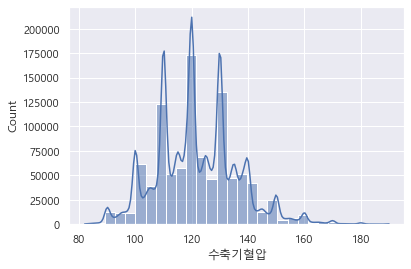

In [10]:
sns.histplot(data = df, x = '수축기혈압', bins = 30, kde = True)

`-` 불편한점 ---> 행이 백만개라 로딩하는데 조금 오래걸림

`-` 분포의 모양을 보면 되게 신기하게 생겼다

`-` 크게 눈에 띄는 봉우리가 4개 존재한다

`-` 즉 몇 군데(봉우리)에 데이터가 많이 몰려있다는 의미이다

<AxesSubplot:xlabel='수축기혈압'>

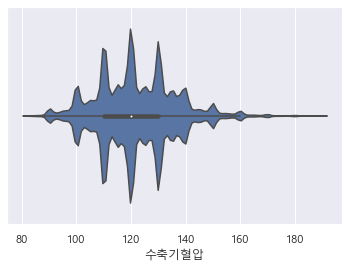

In [46]:
sns.violinplot(x = df['수축기혈압'])

`-` 음 지금으로썬 왜 분포의 모양이 저런지 모르겠다

`-` 근데 사실 궁금한건 고혈압/당뇨인 사람들은 어떤 사람들인가이다

`-` 고혈압/당뇨에 따라 plot을 그려보자

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='수축기혈압'>

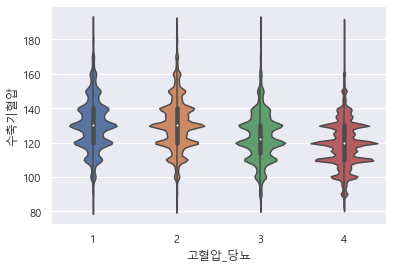

In [48]:
sns.violinplot(x = '고혈압_당뇨', y = '수축기혈압', data = df)

`-` ???? 고혈압_당뇨 진료내역에 따라 분포의 차이가 있긴 하다...

`-` 고혈압/당뇨 진료내역이 없는 사람들의 수축기 혈압은 다른 경우 비해 몇군데에 더욱 많이 몰렸있다

`-` 그런데 봉우리가 많은 분포임을 넷다 동일함 ---> 이유 모름

`-` 데이터를 보면 1은 고혈압 당뇨 둘 다 진료내역이 있고 2는 고혈압만 3은 당뇨만 진료 내역이 있다

`-` 2와 3을 보면 2가 수축기 혈압이 평균적으로 더 높다

`-` 그런데 1과 2를 보면 거의 차이가 없어보인다

`-` 3과 4를 보면 당뇨 진료내역이 있는 사람들이 그렇지 않은 사람보다 평균이 조금 더 크고 분포도 더 넓게 퍼져있다

`-` 고협압/당뇨 둘 다 진료내역이 없는 상황에서 당뇨 진료내역이 추가되면 수축기 혈압이 높아지고 더 넓게 분포한다

`-` 하지만 고혈압 진료내역이 있는 상태라면 당뇨 진료내역의 유무는 수축기 혈압에 거의 영향을 끼치지 못하는 것으로 보인다

`-` 수치로 정확히 확인해보자

In [57]:
pd.Series(df.loc[df['고혈압_당뇨'] == 4, '수축기혈압']).describe() ## 고혈압/당뇨 진료내역 둘 다 없음

count    740662.000000
mean        119.252575
std          13.484496
min          82.000000
25%         110.000000
50%         120.000000
75%         130.000000
max         190.000000
Name: 수축기혈압, dtype: float64

In [58]:
pd.Series(df.loc[df['고혈압_당뇨'] == 3, '수축기혈압']).describe() ## 당뇨 진료내역만 있음

count    43114.000000
mean       123.322146
std         13.618274
min         83.000000
25%        114.000000
50%        122.000000
75%        130.000000
max        190.000000
Name: 수축기혈압, dtype: float64

In [59]:
pd.Series(df.loc[df['고혈압_당뇨'] == 2, '수축기혈압']).describe() ## 고혈압 진료내역만 있음

count    162826.000000
mean        130.551300
std          14.851658
min          82.000000
25%         120.000000
50%         130.000000
75%         140.000000
max         190.000000
Name: 수축기혈압, dtype: float64

In [60]:
pd.Series(df.loc[df['고혈압_당뇨'] == 1, '수축기혈압']).describe() ## 고혈압/당뇨 진료내역 둘 다 있음

count    53398.000000
mean       130.563972
std         14.981472
min         82.000000
25%        120.000000
50%        130.000000
75%        140.000000
max        190.000000
Name: 수축기혈압, dtype: float64

`-` 3과 4의 수축기 혈압 분포는 소름돋을 정도로 똑같다

`-` 1, 2, 3, 4 전부 최대값이 190인걸로 봐선 아마 수축기 혈압 최대값이 190인 것 같다

`-` 1과 2의 경우 당뇨 진료내역이 있는 경우 그렇지 않은 경우보다 수축기 혈압이 평균 4정도 높다

`-` 고혈압이 있는 경우 그렇지 않은 경우보다 수축기 혈압이 평균 10정도 높다

`-` 이완기 혈압도 수축기 혈압과 비슷한 양상을 보일까?

<AxesSubplot:xlabel='이완기혈압', ylabel='Count'>

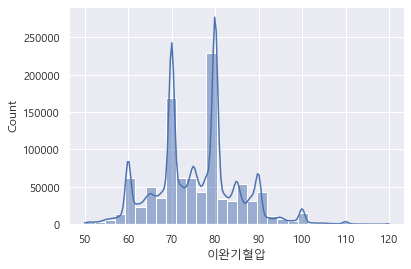

In [61]:
sns.histplot(data = df, x = '이완기혈압', bins = 30, kde = True)

`-` 이완기 혈압도 수축기 혈압의 분포처럼 몇 군에데 데이터가 많이 몰려있는 분포(봉우리)이다

`-` 수축기 혈압 분포와 이완기 혈압 분포를 같이 놓고 비교해보자

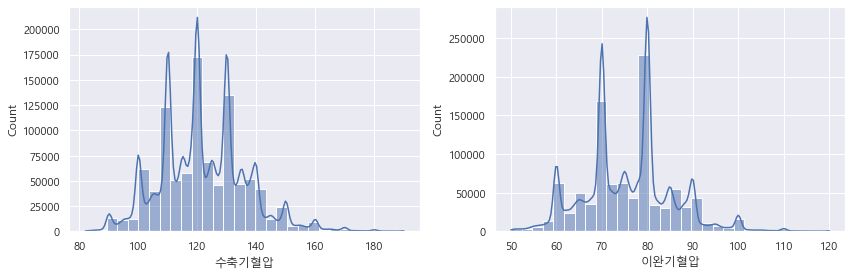

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

sns.histplot(data = df, x = '수축기혈압', bins = 30, kde = True, ax = ax1)
sns.histplot(data = df, x = '이완기혈압', bins = 30, kde = True, ax = ax2)

fig.tight_layout()

`-` 수축기 혈압 분포의 봉우리가 이완기 혈압 분포의 봉우리 개수보다 많다

`-` 수축기 혈압이 이완기 혈압 분포보다 더 넓게 퍼져있다(표준 편차가 더 크다)

`-` 고혈압/당뇨에 따른 이완기 혈압 분포를 확인하자

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='이완기혈압'>

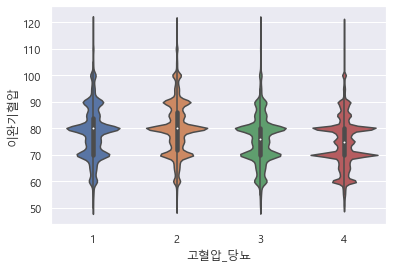

In [65]:
sns.violinplot(x = '고혈압_당뇨', y = '이완기혈압', data = df)

`-` 이완기 혈압도 수축기혈압과 동일한 양상을 보인다

`-` 결과적으로 보면 당뇨 진료내역 여부는 혈압에 영향을 별로 끼치지 못한다

`-` 고혈압은 혈압을 높이도록 영향을 끼친다 ---> 당연한 소리

`-` 여기서 확인하는 고혈압 진료내역의 의미

`-` 현재 고혈압에 앓고있을 수 도 있고 아니면 과거에 고혈압에 걸렸었던 것일 수 도 있다

`-` 즉 현재 고혈압인 경우와 과거에 고혈압이었던 경우로 나뉨 ---> 당뇨도 마찬가지

`-` 해볼 시각화 

`-` 혈압 구간으로 cut하여 다른 변수와의 관계 확인

`-` 양적 변수간의 상관관계 확인

`-` 남여별로 차이가 있는지 확인 등등

`-` 연령대별 고혈압/당뇨

`-` 고혈압/당뇨 도수분포표

`-` 공복혈당의 분포를 히스토그램을 그려 확인하자

<AxesSubplot:xlabel='공복혈당', ylabel='Count'>

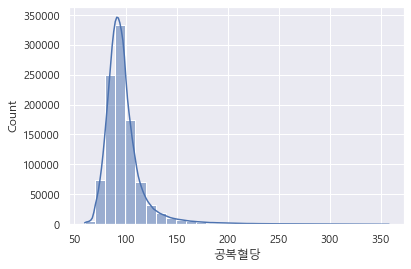

In [70]:
sns.histplot(data = df, x = '공복혈당', bins = 30, kde = True)

`-` 오른쪽으로 꼬리가 긴 분포이다

`-` BMI의 분포를 히스토그램을 그려 확인하자

<AxesSubplot:xlabel='BMI', ylabel='Count'>

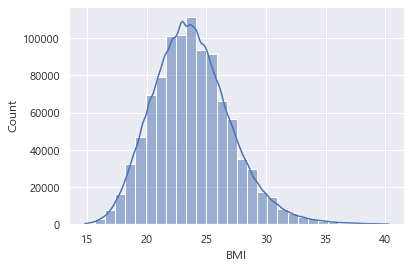

In [71]:
sns.histplot(data = df, x = 'BMI', bins = 30, kde = True)

`-` 종모양이다

`-` 정규분포를 따르는지 Q-Q plot을 그려 확인하자(나중에)

`-` 양적변수간의 상관관계 행렬을 그려보자

In [11]:
corr_df = df.loc[:, ('수축기혈압', '이완기혈압', '공복혈당', 'BMI')]

In [12]:
corr_df.head(6)

,수축기혈압,이완기혈압,공복혈당,BMI
0,116,78,94,16.6
1,100,60,79,22.3
2,100,60,87,21.9
3,111,70,72,20.2
4,120,80,98,20.0
5,115,79,95,23.1


In [13]:
corr_matrix = corr_df.corr(method = 'pearson') # 상관관계 행렬

In [14]:
corr_matrix

,수축기혈압,이완기혈압,공복혈당,BMI
수축기혈압,1.000000,0.743006,0.186501,0.304383
이완기혈압,0.743006,1.000000,0.138717,0.275492
공복혈당,0.186501,0.138717,1.000000,0.173688
BMI,0.304383,0.275492,0.173688,1.000000


<AxesSubplot:>

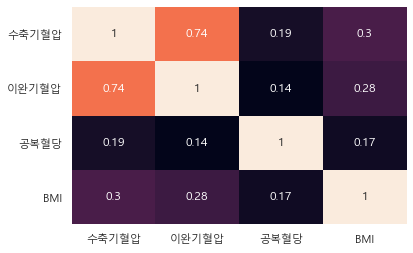

In [18]:
sns.heatmap(corr_matrix, annot = True, cbar = False)

`-` 수축기혈압과 이완기혈압은 상관계수가 0.74로 높고 나머지는 그저 그렇다

`-` 고혈압/당뇨 범주에 따라 상관계수 행렬을 그려보자